# Dataset Overview & Descriptive Analysis 

imports

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

DATA EXPLORATION


In [ ]:
%matplotlib inline
sns.set(style="whitegrid")

--Loading the Dataset--



In [ ]:
df = pd.read_csv('../Data/healthcare-dataset-stroke-data.csv')
df.head()


--shows the number of entries, column types, and non-null counts--

In [ ]:
df.info()
#5110 entries and 12 columns
#bmi has null values


--Statistical Summary-- 
count:Number of non-null  entries in the column
mean:The average value
std:The standard deviation 
min:The smallest value
25%:The first quartile (25% of values are below this)
50%:(median)The middle value (half above, half below)
75%:The third quartile (75% of values are below this)
max:The largest value


In [ ]:
df.describe().T

--Number of Null values in each column--

In [ ]:
df.isnull().sum()

--number of unique values in each column--

In [ ]:
df.nunique()
#gender has 3 unique values, which is not expected



--unique values in each column--


In [ ]:
for i in df.columns:
    print("Number of Unique Values in ",i,':',df[i].nunique())
    print("Unique Values in ",i,':',df[i].unique()) if df[i].nunique()<10 else print()

--Check for duplicated values--

In [ ]:
df.duplicated().sum()
#No duplicate values

--Check for categorical columns--
(Categorical columns are columns where the values represent categories or groups, not continuous numbers)

In [ ]:
#df.select_dtypes(include='object').columns :didnt work correctly(0,1 not included)
categorical_cols = [col for col in df.columns if df[col].nunique() < 10]
categorical_cols

--percentage of patients who had a stroke--
(target variable distribution)

In [ ]:
print(df['stroke'].value_counts())

df['stroke'].value_counts(normalize=True) * 100


-- check number of patients in each age group--

In [ ]:
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 40, 60, 100], 
                         labels=['Child', 'Adult', 'Middle Age', 'Senior'])
df['age_group'].value_counts()


--Check how many values are zero--

In [ ]:
(df[['age', 'bmi', 'avg_glucose_level']] == 0).sum()
#zero is invalid value for age, bmi and avg_glucose_level

--Stroke count by work type--

In [ ]:
pd.crosstab(df['work_type'], df['stroke'])


--Stroke ratio by smoking status--

In [ ]:
pd.crosstab(df['smoking_status'], df['stroke'], normalize='index') * 100
#smoking status is not a good predictor of stroke

--Stroke count by gender--

In [ ]:
pd.crosstab(df['gender'], df['stroke'])


--stroke ratio by age group--

In [ ]:

df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 18, 40, 60, 100],
    labels=['Child', 'Adult', 'Middle Age', 'Senior']
)

stroke_ratio = pd.crosstab(df['age_group'], df['stroke'], normalize='index')

stroke_ratio.columns = ['No Stroke', 'Stroke']

print(" Stroke Rate by Custom Age Group (%):")
print(stroke_ratio.round(3))



--Check correlation of each numeric feature with the target--

In [ ]:

df.corr(numeric_only=True)['stroke'].sort_values(ascending=False)
#Values range from -1(prefect negative correleation) to +1(perfect positive correleation)

PCA


--Preparing the Data--

In [ ]:
# Select numeric features (exclude 'id', target 'stroke', and maybe 'age_group' or any categorical)
features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

# Drop rows with missing values (if any)
df_clean = df[features + ['stroke']].dropna()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[features].values)


--Apply PCA to reduce to 2 dimensions--

In [129]:
# Create PCA model
pca = PCA(n_components=2)

# Fit and transform the data
X_pca = pca.fit_transform(X_scaled)


--Create a DataFrame for visualization--

In [130]:
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['stroke'] = df_clean['stroke'].values


--visualize with seaborn--

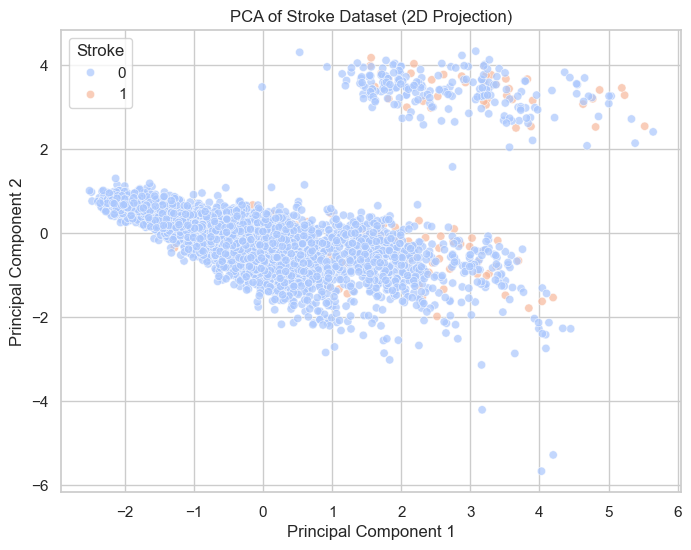

In [131]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='stroke',
    data=pca_df,
    palette='coolwarm',
    alpha=0.7
)
plt.title('PCA of Stroke Dataset (2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Stroke')
plt.grid(True)
plt.show()
